In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
# loading the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
# convert all the images to array using pathlib

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

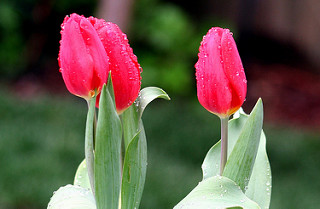

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [7]:
# convert images to numpy array 

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [8]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [9]:
str(flowers_images_dict['roses'][0])


'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [10]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [11]:
# images shape
img.shape


(240, 179, 3)

In [12]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [13]:
# append images after resizing 
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [14]:
X = np.array(X)
y = np.array(y)


In [15]:
# train, test split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [16]:
# scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [18]:
# Building the CNN then train it

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              
0

Epoch 1/30
86/86 [==============================] - 105s 1s/step - loss: 1.3531 - accuracy: 0.4488
Epoch 2/30
86/86 [==============================] - 73s 845ms/step - loss: 1.0087 - accuracy: 0.6108
Epoch 3/30
86/86 [==============================] - 73s 848ms/step - loss: 0.8606 - accuracy: 0.6704
Epoch 4/30
86/86 [==============================] - 78s 904ms/step - loss: 0.6841 - accuracy: 0.7464
Epoch 5/30
86/86 [==============================] - 85s 994ms/step - loss: 0.5127 - accuracy: 0.8169
Epoch 6/30
86/86 [==============================] - 83s 967ms/step - loss: 0.3397 - accuracy: 0.8877
Epoch 7/30
86/86 [==============================] - 69s 804ms/step - loss: 0.2052 - accuracy: 0.9320
Epoch 8/30
86/86 [==============================] - 75s 867ms/step - loss: 0.1247 - accuracy: 0.9615
Epoch 9/30
86/86 [==============================] - 70s 808ms/step - loss: 0.0905 - accuracy: 0.9760
Epoch 10/30
86/86 [==============================] - 74s 862ms/step - loss: 0.0473 - accuracy

0

In [20]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 8s 257ms/step - loss: 3.1759 - accuracy: 0.6405


[3.175929307937622, 0.6405228972434998]

In [21]:
# sample of predictions 

predictions = model.predict(X_test_scaled)
predictions


29/29 [==============================] - 9s 291ms/step


array([[  3.9059713 ,  13.601375  , -11.21156   , -22.370024  ,
        -12.194133  ],
       [  8.837273  ,  -1.473808  ,  -5.1363015 ,  -8.363771  ,
          3.9429429 ],
       [ -5.79178   ,  -3.2075713 ,  10.0111065 , -12.373314  ,
         -7.4796915 ],
       ...,
       [ -1.2577943 ,  -7.5687284 , -14.488162  ,   0.757066  ,
          8.50369   ],
       [ -4.8279037 ,   0.16112678,   5.0642004 ,  -0.8599896 ,
         -8.218662  ],
       [  2.2166843 , -13.315294  ,  -1.095451  ,   6.701796  ,
          4.3300066 ]], dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])


In [23]:
np.argmax(score)


1

In [24]:
y_test[0]


1

In [31]:
# working on improving ( Test Accuracy ) by Using Data Augmentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (10940634.py, line 6)

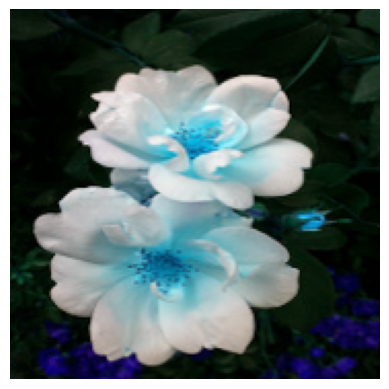

In [32]:
# showing the original image after done the Data Augmentation process

plt.axis('off')
plt.imshow(X[0])


NameError: name 'data_augmentation' is not defined

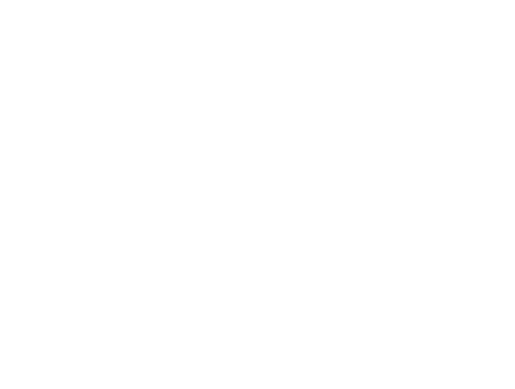

In [33]:
#Newly generated training image

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [34]:
# training the model (Data Augmentation, drop out layer)

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    


NameError: name 'data_augmentation' is not defined

In [35]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 11s 301ms/step - loss: 3.1759 - accuracy: 0.6405


[3.175929307937622, 0.6405228972434998]

In [36]:
#now the accuracy of test set increased after using Data Augmentation, drop out layer


In [1]:
pipreqs


NameError: name 'pipreqs' is not defined

In [2]:
pip install pipreqs


  Using cached pipreqs-0.4.11-py2.py3-none-any.whl (32 kB)
  Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)

[notice] A new release of pip available: 22.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pipreqs


NameError: name 'pipreqs' is not defined